In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
basic_fns = [
    lambda x: x,
    lambda x: x**2,
    lambda x: np.sin(x),
    lambda x: np.cos(x),
    lambda x: np.exp(x)/100,
]

def lstsq_approx(x, y, fns):
    A = np.array([[fn(xi) for fn in fns] for xi in x])
    x = A.T @ A
    y = A.T @ y
    coeffs = np.linalg.solve(x, y)
    return coeffs

In [27]:
data = np.loadtxt('./approx_guess/func_guess_data.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]
data.shape

(500, 2)

In [28]:
coeffs = lstsq_approx(x, y, basic_fns)
print("Coefficients:", coeffs)

Coefficients: [ 3.03632154 -1.00599842 10.05337359 15.04934181  1.00257185]


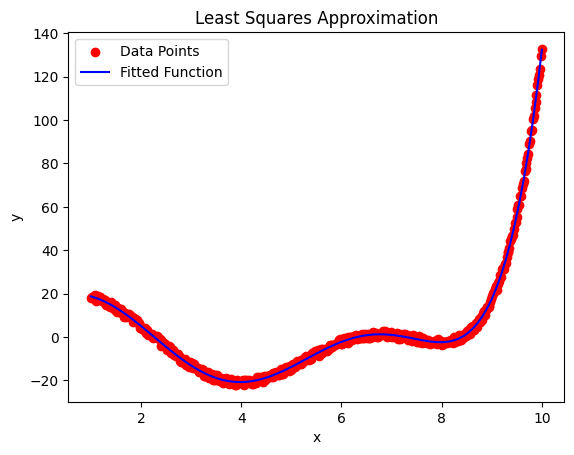

In [29]:
x_fit = np.linspace(min(x), max(x), 100)
y_fit = sum(c * fn(x_fit) for c, fn in zip(coeffs, basic_fns))

plt.scatter(x, y, label='Data Points', color='red')
plt.plot(x_fit, y_fit, label='Fitted Function', color='blue')
plt.legend()
plt.title('Least Squares Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()